# Random Graphs: Theory and Computation

This notebook demonstrates key properties of classical random graph models with simple interactive experiments.

## Models
1. **Erdős–Rényi G(n,p)**: Random graphs with independent edge probabilities.
   - **Largest component**: The size of the largest connected component in the graph.
   - **Degree of a vertex**: Number of edges incident to that vertex.
2. **Galton–Watson trees**: Branching processes modeling population growth.
   - Can study **extinction probability** (tree dies out) or **truncated trees** (limit generations for visualization).
   - Even if extinction is guaranteed (λ < 1), the average number of nodes per generation can temporarily increase before dying out.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphs import generate_erdos_renyi, generate_galton_watson_tree
from visualization import ErdosRenyi, GaltonWatson

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12

## Interactive Erdős–Rényi Visualization
Observe the structure and how the largest connected component changes.

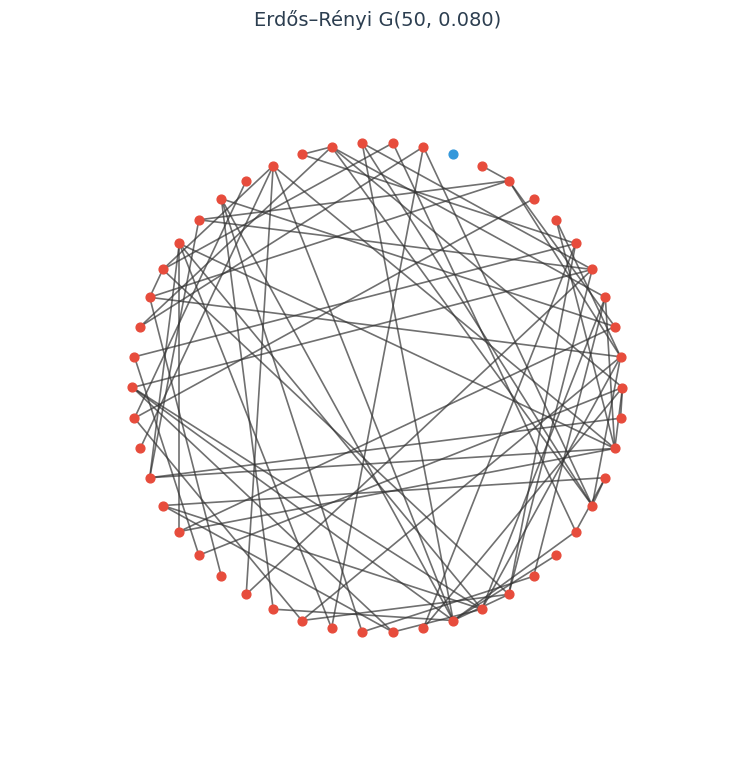

In [2]:
visualizer_er = ErdosRenyi(n=50, p=0.08)
plt.show()

## Interactive Galton–Watson Visualization
You can either look at the full extinction probability or truncate the tree to a fixed number of generations for visualization purposes.

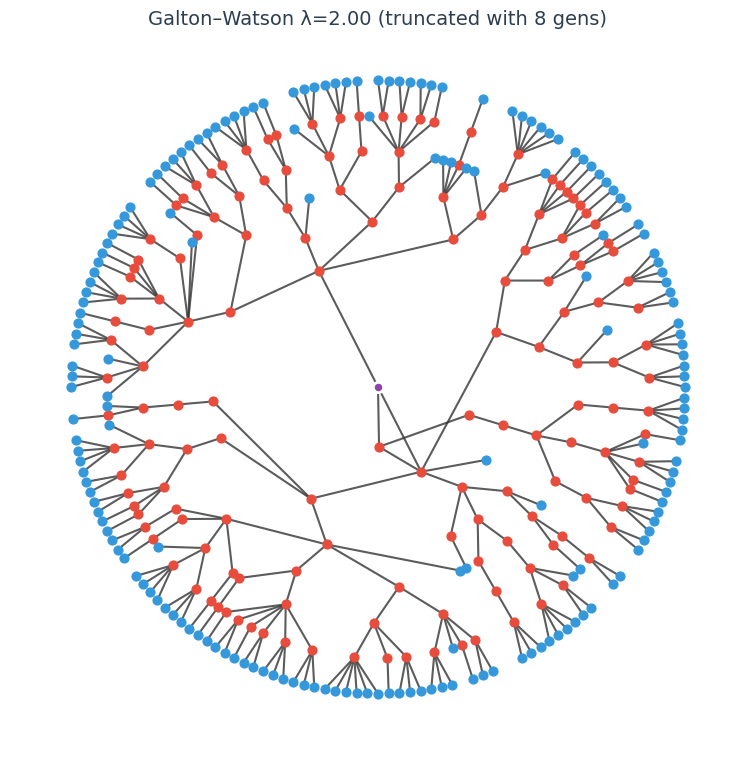

In [3]:
visualizer_gw = GaltonWatson(lam=2, max_gen=8)
plt.show()

## Phase Transition in Erdős–Rényi
- **Subcritical**: p << 1/n → all connected components are small.
- **Critical**: p ≈ 1/n → largest component grows roughly as n^(2/3).
- **Supercritical**: p >> 1/n → giant component emerges (most nodes belong to one large connected cluster).

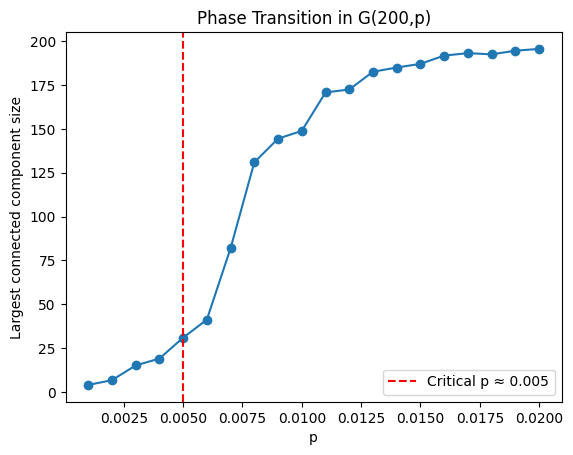

In [4]:
def analyze_components(n=200, p_values=None):
    if p_values is None:
        p_values = np.linspace(0.001, 0.02, 20)
    largest = []
    critical_p = 1/n
    for p in p_values:
        comps = []
        for _ in range(10):
            g = generate_erdos_renyi(n, p)
            visited = [False]*n
            max_c = 0
            for start in range(n):
                if not visited[start]:
                    queue = [start]
                    visited[start] = True
                    size = 0
                    while queue:
                        node = queue.pop(0)
                        size += 1
                        for nei in g.get_neighbors(node):
                            if not visited[nei]:
                                visited[nei]=True
                                queue.append(nei)
                    max_c = max(max_c, size)
            comps.append(max_c)
        largest.append(np.mean(comps))
    plt.plot(p_values, largest,'o-')
    plt.axvline(critical_p,color='red',linestyle='--',label=f'Critical p ≈ {critical_p:.3f}')
    plt.xlabel('p')
    plt.ylabel('Largest connected component size')
    plt.title(f'Phase Transition in G({n},p)')
    plt.legend()
    plt.show()
    return p_values, largest

p_vals, comps = analyze_components()

## Degree Distribution
- The **degree** of a vertex is the number of edges connected to it.
- In G(n,p), degrees are roughly Poisson distributed with mean np.

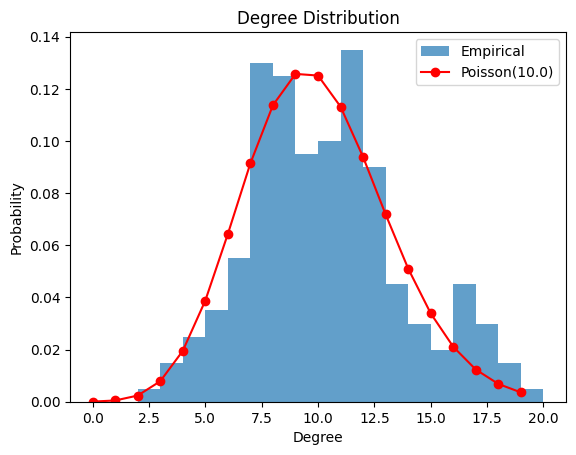

In [5]:
def degree_distribution(n=200,p=0.05):
    g = generate_erdos_renyi(n,p)
    degs = [len(g.get_neighbors(i)) for i in range(n)]
    exp_deg = (n-1)*p
    plt.hist(degs,bins=range(max(degs)+2),density=True,alpha=0.7,label='Empirical')
    k = range(max(degs)+1)
    pois = [np.exp(-exp_deg)*(exp_deg**i)/math.factorial(i) for i in k]
    plt.plot(k,pois,'ro-',label=f'Poisson({exp_deg:.1f})')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution')
    plt.legend()
    plt.show()
    return degs, exp_deg

degs, exp_deg = degree_distribution()

## Galton–Watson: Average Population per Generation
- Even if λ < 1 (subcritical), the number of nodes can temporarily increase before eventual extinction.
- This experiment tracks the **average number of nodes per generation**.

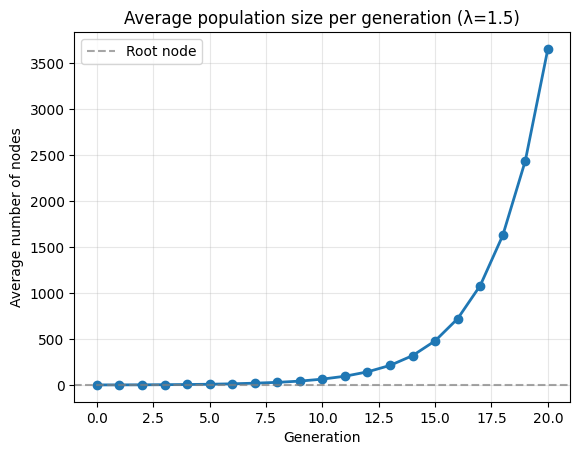

In [6]:
# Parameters
lam = 1.5          # Poisson parameter
max_gen = 20    # Maximum generations
n_trials = 100   # Number of trials

# Initialize array to accumulate node counts per generation
pop_sizes = np.zeros(max_gen+1)  # +1 to include root generation

for _ in range(n_trials):
    tree, reached_max, sizes = generate_galton_watson_tree(lam, max_gen)
    for i, size in enumerate(sizes):
        pop_sizes[i] += size

# Compute average over trials
pop_sizes /= n_trials

# Plot average population per generation
plt.plot(range(max_gen+1), pop_sizes, 'o-', linewidth=2)
plt.axhline(1, color='gray', linestyle='--', alpha=0.7, label='Root node')
plt.xlabel('Generation')
plt.ylabel('Average number of nodes')
plt.title(f'Average population size per generation (λ={lam})')
plt.grid(True, alpha=0.3)
plt.legend()